In [2]:
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn import svm
from scipy.io import loadmat
import numpy as np

In [3]:
filename = 'data2.mat'
data_base = loadmat(filename)

In [4]:
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x) 
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
def draw_decision_line(model,data_test):
    plt.scatter(data_test[:,0],data_test[:,1],c=data_test[:,2])

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0],xlim[1],30)
    yy = np.linspace(ylim[0],ylim[1],30)
    YY,XX = np.meshgrid(yy,xx)

    xy = np.vstack([XX.ravel(),YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX,YY,Z,colors='b',levels = [-1,0,1],alpha=0.5,linestyles = ['--','-','--'])
    ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=100,linewidths=1,facecolors='none')

In [5]:
data_train,data_test = train_test_split(np.hstack((data_base['X'],data_base['y'])),test_size=0.3,random_state=True)
len(data_base['X']),len(data_train),len(data_test)

(863, 604, 259)

0.7142857142857143


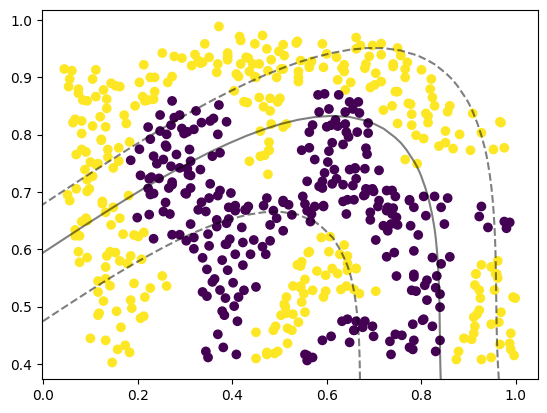

In [6]:
model = svm.SVC( C= 100,kernel='poly')
model.fit(data_train[:,:2],data_train[:,2].ravel())
score = model.score(data_test[:,:2],data_test[:,2].ravel())
print(score)
plt.scatter(data_train[:,0],data_train[:,1],c=data_train[:,2])
plot_svc_decision_function(model)

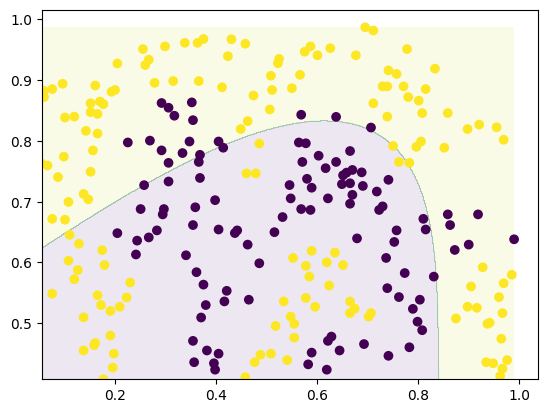

In [7]:
arr1 = np.arange(data_test[:,0].min(), data_test[:,0].max(), 0.001)
arr2 = np.arange(data_test[:,1].min(), data_test[:,1].max(), 0.001)

xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
labels = model.predict(input_array)

plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(data_test[:,0],data_test[:,1],c=data_test[:,2])

0.9459459459459459

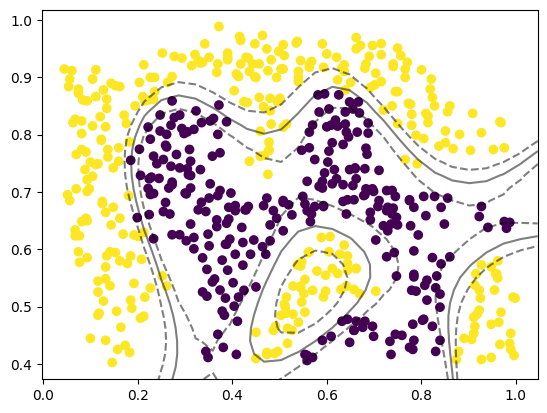

In [8]:
model = svm.SVC( C= 100,kernel='rbf')
model.fit(data_train[:,:2],data_train[:,2].ravel())

plt.scatter(data_train[:,0],data_train[:,1],c=data_train[:,2])
plot_svc_decision_function(model)

score = model.score(data_test[:,:2],data_test[:,2].ravel())
score

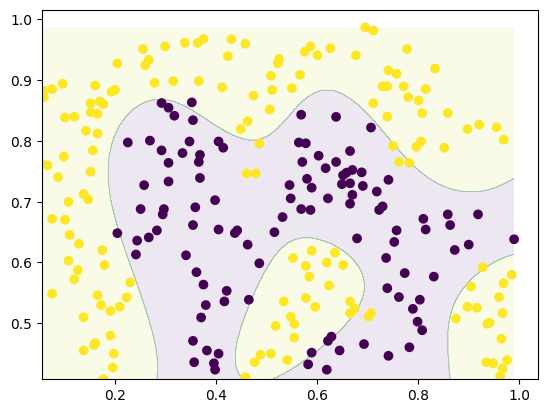

In [9]:
arr1 = np.arange(data_test[:,0].min(), data_test[:,0].max(), 0.001)
arr2 = np.arange(data_test[:,1].min(), data_test[:,1].max(), 0.001)

xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
labels = model.predict(input_array)

plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(data_test[:,0],data_test[:,1],c=data_test[:,2])

0.5482625482625483


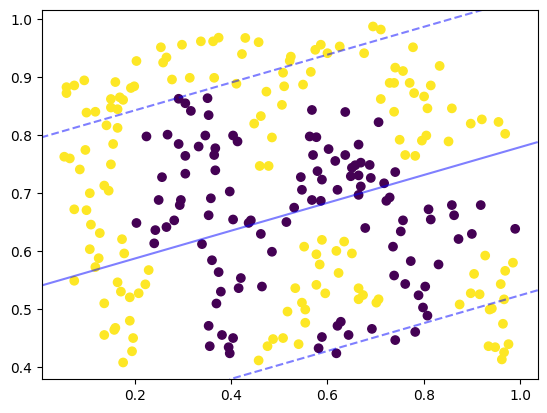

In [10]:
model = svm.SVC( C= 100,kernel='linear')
model.fit(data_train[:,:2],data_train[:,2].ravel())
score = model.score(data_test[:,:2],data_test[:,2].ravel())
print(score)
draw_decision_line(model,data_test)